<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [32]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [3]:
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

# Nombres de columnas según la documentación UCI
column_names = [
    "CRIM",      # 1 per capita crime rate by town
    "ZN",        # 2 proportion of residential land zoned for lots over 25k sq.ft.
    "INDUS",     # 3 proportion of non-retail business acres per town
    "CHAS",      # 4 Charles River dummy variable (=1 if tract bounds river)
    "NOX",       # 5 Nitric oxides concentration
    "RM",        # 6 average number of rooms per dwelling
    "AGE",       # 7 proportion of owner-occupied units built prior to 1940
    "DIS",       # 8 weighted distances to employment centres
    "RAD",       # 9 index of accessibility to radial highways
    "TAX",       # 10 full-value property-tax rate per $10k
    "PTRATIO",   # 11 pupil–teacher ratio by town
    "B",         # 12 proportion of blacks by town (= 1000 * (Bk - 0.63)^2)
    "LSTAT",     # 13 % lower status of the population
    "MEDV"       # 14 Median value of homes in $1000s
]

df = pd.read_csv(url, sep=r"\s+", header=None, names=column_names)

# -----------------------------------------------
# 3. Mostrar información solicitada
# -----------------------------------------------

print("Número de atributos (columnas):", df.shape[1])
print("\nNombres de atributos:")
print(df.columns.tolist())

print("\n Número de filas en el dataset:", df.shape[0])

print("\n Verificación de missing values:")
print(df.isna().sum())


Número de atributos (columnas): 14

Nombres de atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

 Número de filas en el dataset: 506

 Verificación de missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Frecuencia de la variable categórica CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


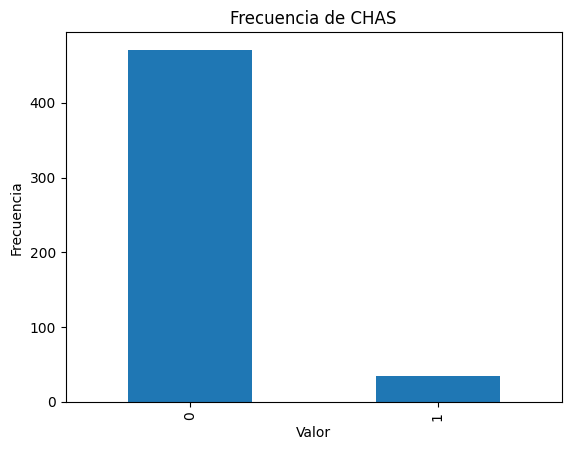


Estadísticos descriptivos de variables numéricas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   1

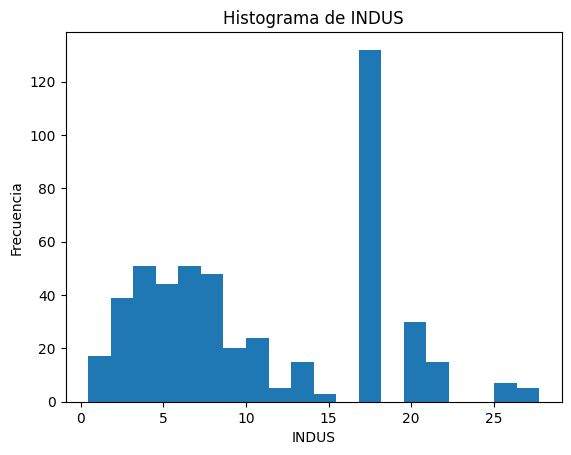

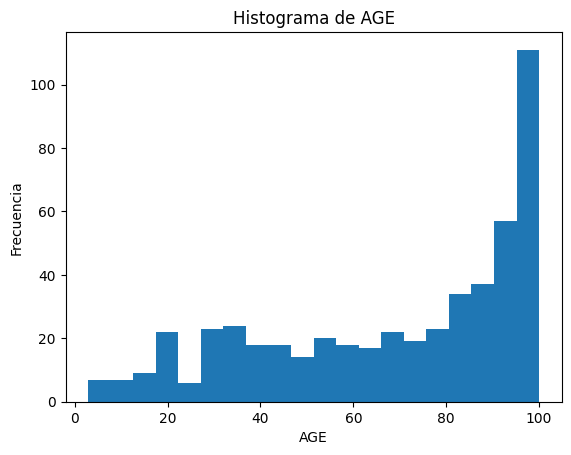

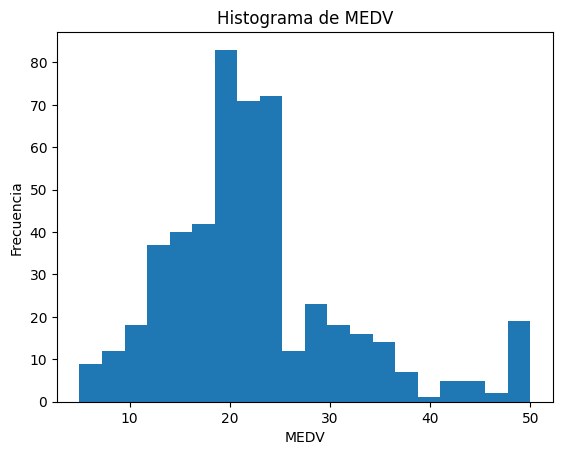

In [5]:
# VARIABLES CATEGÓRICAS ----------------------------
# En este dataset, la única variable categórica es CHAS (0 = no colinda con el río, 1 = sí colinda)

print("Frecuencia de la variable categórica CHAS:")
print(df["CHAS"].value_counts())

# Gráfico de barras
df["CHAS"].value_counts().plot(kind="bar")
plt.title("Frecuencia de CHAS")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


# VARIABLES NUMÉRICAS ------------------------------
print("\nEstadísticos descriptivos de variables numéricas:")
print(df.describe())

# Histogramas de INDUS, AGE, MEDV
variables = ["INDUS", "AGE", "MEDV"]

for var in variables:
    plt.hist(df[var], bins=20)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>


### **1. Variable categórica (CHAS)**

CHAS indica si la casa está cerca del río Charles.
Al ver los resultados, se nota que:

* **La mayoría de las casas (471)** no están cerca del río.
* Solo **35 casas** están ubicadas cerca del río.

Esto significa que la variable está **muy desequilibrada**, ya que casi todas las casas pertenecen a la categoría 0. Más adelante, en modelos de clasificación, esto podría influir en el desempeño.


### **2. Variables numéricas**

Los estadísticos descriptivos nos ayudan a entender cómo se comportan las variables.

Algunas observaciones:

* Las variables usan **escalas muy distintas**, por ejemplo CRIM va desde casi 0 hasta 88, mientras que MEDV llega a 50. Esto sugiere que más adelante será útil **escalar los datos**.
* **RM (habitaciones)** tiene un promedio de alrededor de 6 habitaciones por casa.
* **AGE** muestra que muchas casas son antiguas, ya que el valor promedio es 68% (casas construidas antes de 1940).
* **MEDV (precio de las casas)** tiene una media de unos 22.5 (miles de dólares) y un valor máximo de 50, que es un límite del dataset.



### **3. Histogramas**

#### **INDUS**

El histograma muestra que la distribución no es uniforme.
Hay muchas zonas con poca área industrial, pero también un pico grande cerca de valores más altos. Esto indica que las áreas económicas están distribuidas de forma desigual en la ciudad.

#### **AGE**

Aquí se ve claramente que hay muchas casas antiguas. La mayor parte está entre 70 y 100 años. Las casas nuevas son menos frecuentes.

#### **MEDV**

La mayoría de los precios de las viviendas se concentran entre los 15 y 25 mil dólares.
También se ve que el valor 50 aparece bastante, lo cual pasa porque el dataset tiene ese valor como límite máximo.



### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

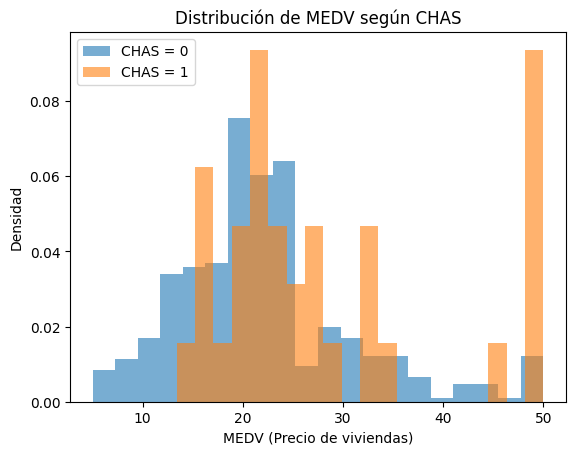

In [6]:
# Filtrar datos por cada clase de CHAS
medv_chas_0 = df[df["CHAS"] == 0]["MEDV"]
medv_chas_1 = df[df["CHAS"] == 1]["MEDV"]

# Crear el gráfico con histogramas sobrepuestos
plt.hist(medv_chas_0, bins=20, alpha=0.6, label="CHAS = 0", density=True)
plt.hist(medv_chas_1, bins=20, alpha=0.6, label="CHAS = 1", density=True)

plt.title("Distribución de MEDV según CHAS")
plt.xlabel("MEDV (Precio de viviendas)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Al comparar los histogramas de MEDV entre las dos clases de CHAS, se pueden notar algunas diferencias interesantes. En general, las casas que no están cerca del río (CHAS = 0) muestran una distribución de precios más amplia y variada. Los valores se reparten desde precios bajos hasta valores medios y altos.

Por otro lado, las casas cerca del río (CHAS = 1) parecen concentrarse un poco más en precios más altos. Aunque la cantidad de casas en esta categoría es pequeña, se observa que tienden a tener valores de MEDV superiores en comparación con CHAS = 0.

Con esto creo  que vivir cerca del río podría estar relacionado con un precio más alto, aunque probablemente no sea el factor más importante del dataset. Aun así, parece que CHAS sí podría tener algo de peso al momento de predecir el precio de las casas.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [7]:
# Calcular matriz de correlación
correlaciones = df.corr()

# Mostrar correlación de cada variable con MEDV
print("Correlación de cada atributo numérico con MEDV:\n")
print(correlaciones["MEDV"])

Correlación de cada atributo numérico con MEDV:

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


Al revisar la correlación de cada variable con MEDV, se pueden ver cuáles atributos están más relacionados con el precio de las viviendas. Algunas observaciones importantes:

RM (número de habitaciones) tiene una correlación positiva alta (~0.69). Esto indica que, en general, mientras más habitaciones tiene la casa, mayor es su valor. Es una de las variables que más influye en el precio.

LSTAT (porcentaje de población de bajo estatus) tiene una correlación negativa fuerte (~–0.73). Esto significa que cuando aumenta el porcentaje de residentes con menor estatus socioeconómico, los precios de las casas tienden a bajar. Es uno de los factores más importantes.

PTRATIO, INDUS, NOX, TAX, CRIM y otras variables también muestran correlaciones negativas, aunque un poco más moderadas. Esto sugiere que mayor contaminación, más industria, más crimen o impuestos altos suelen asociarse con precios más bajos.

B y ZN tienen correlaciones positivas, pero no tan altas. Parece que sí aportan información, pero no tanta como RM o LSTAT.

CHAS tiene una correlación baja (~0.17). Aunque vivir cerca del río puede elevar un poco el precio, no es un factor muy determinante comparado con otras variables.

En general, las variables que más peso parecen tener para predecir MEDV son RM (positiva) y LSTAT (negativa), ya que sus correlaciones son las más fuertes.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


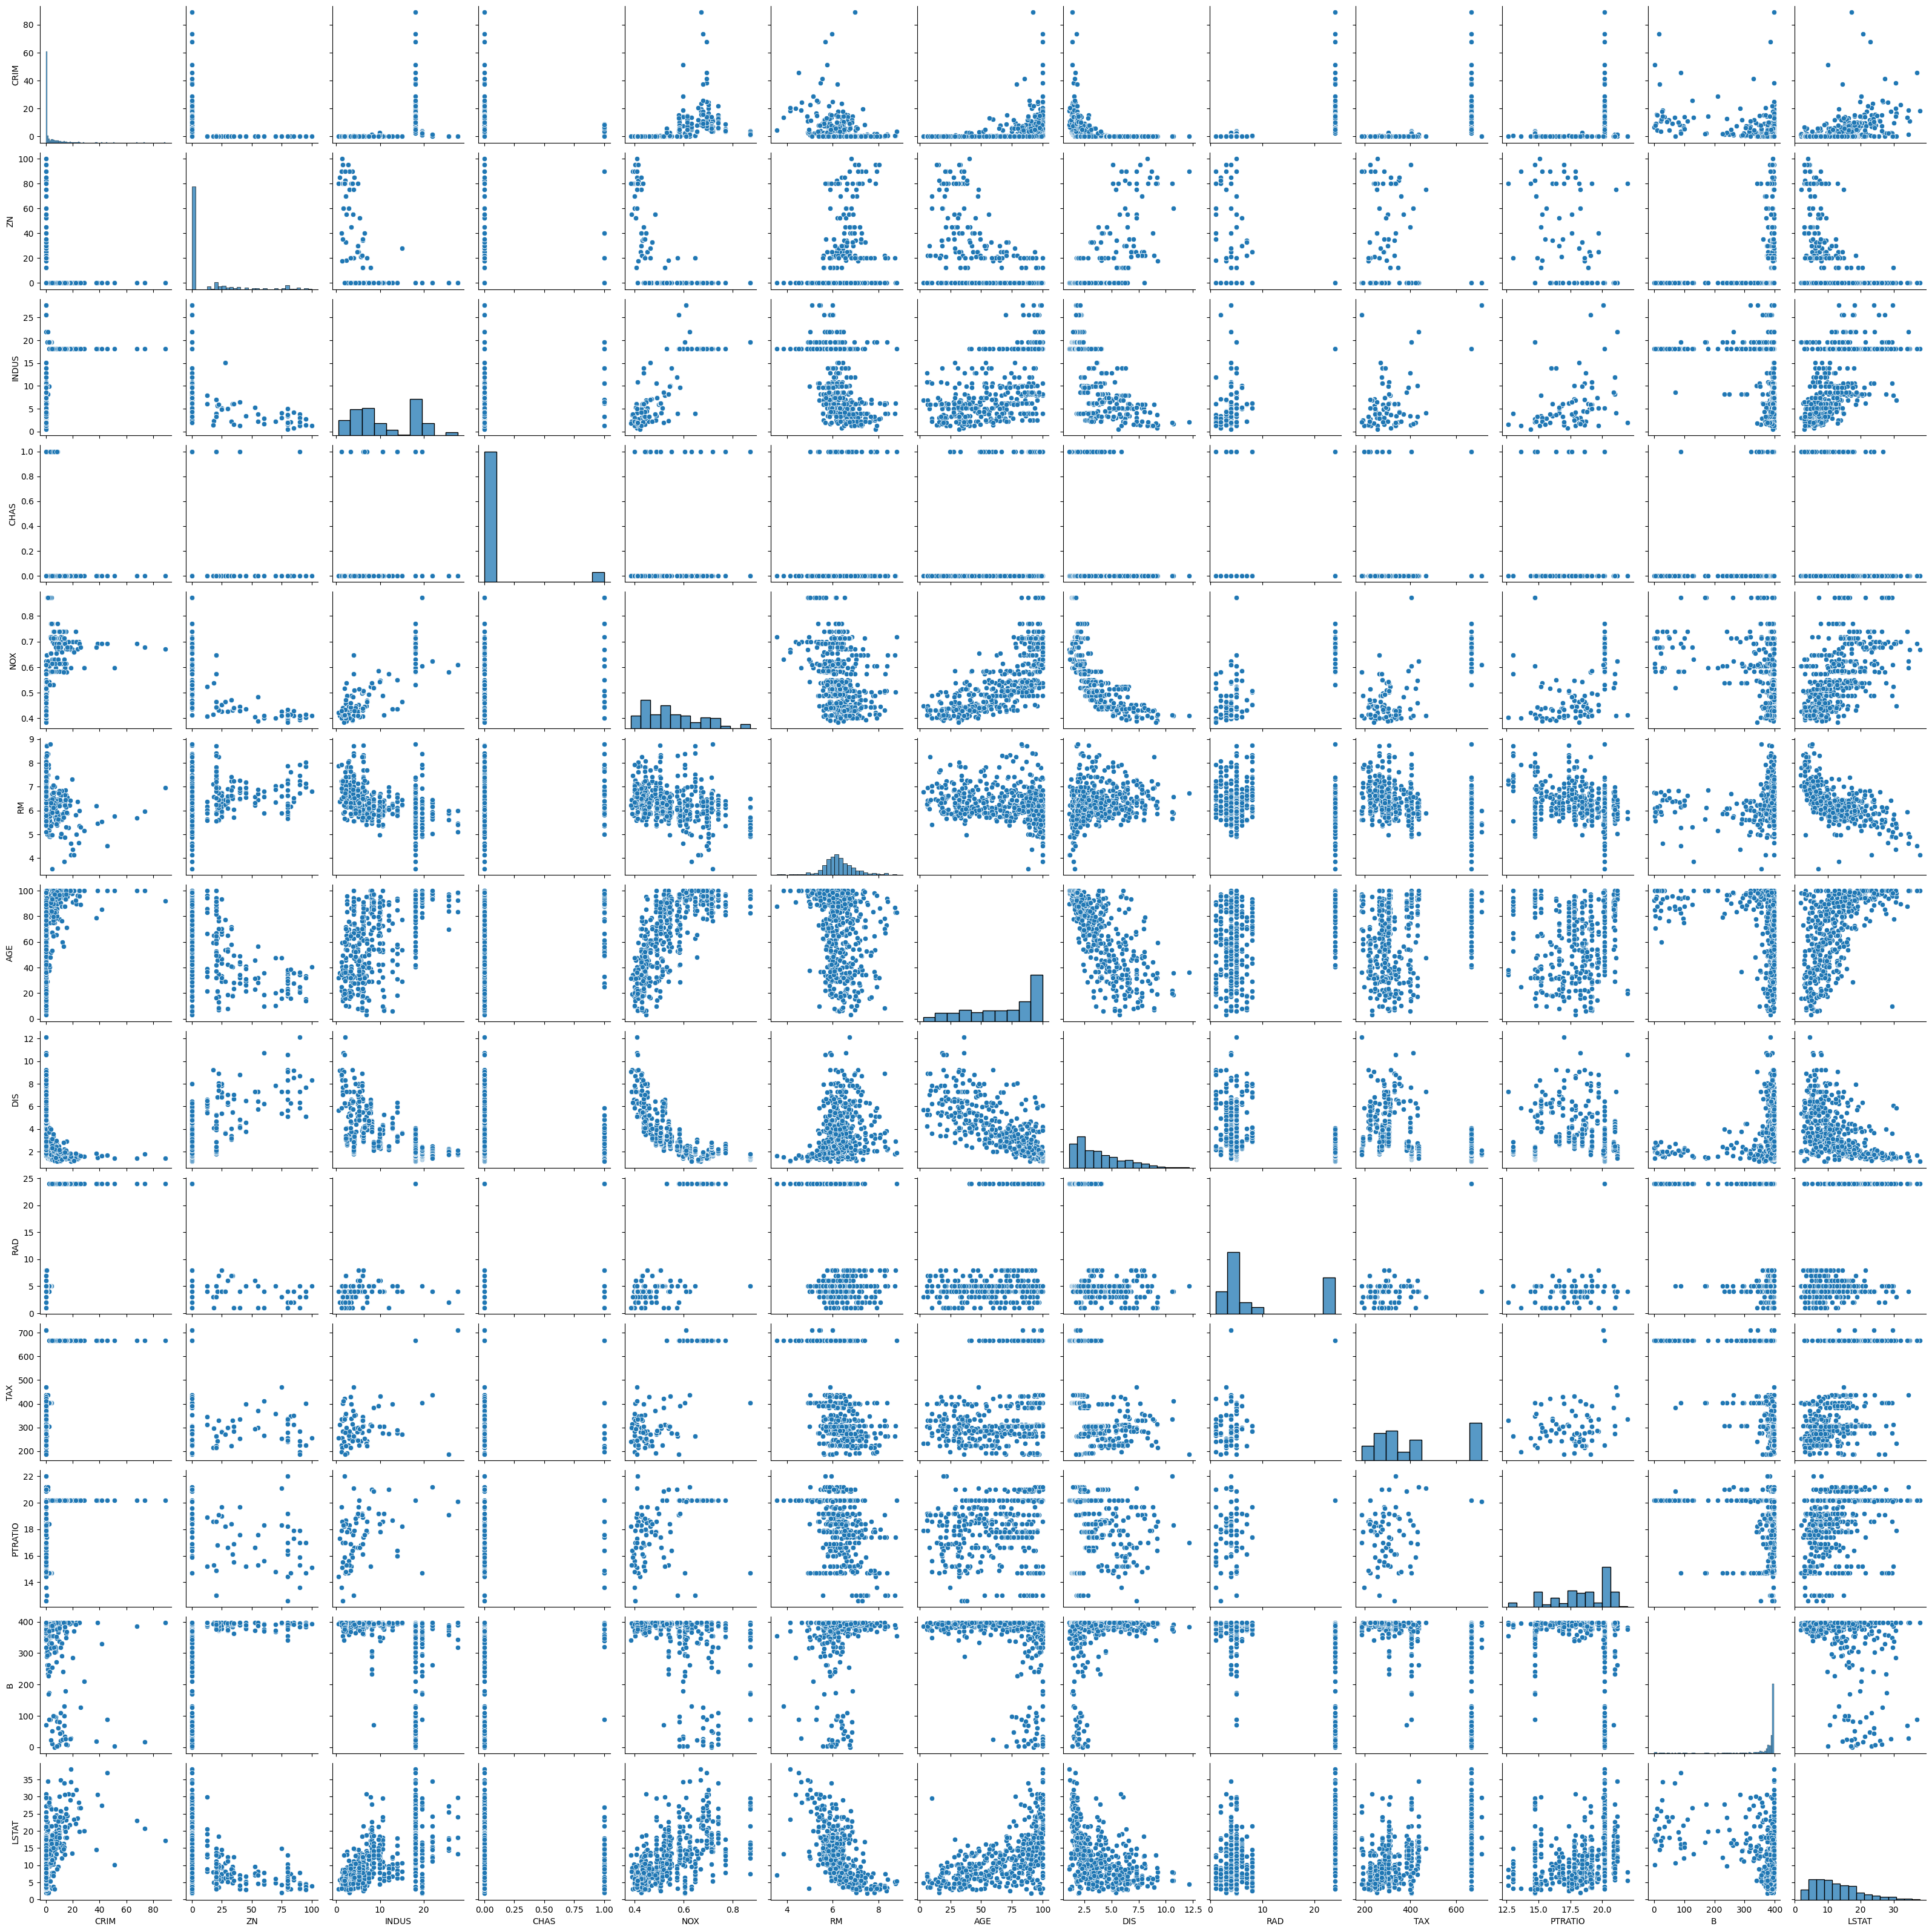

In [9]:
# Seleccionar solo variables numéricas (excepto MEDV)
vars_numericas = df.drop(columns=["MEDV"])

# Crear el pairplot
sns.pairplot(vars_numericas)
plt.show()

Al mirar el pairplot, se nota que varias variables tienen relaciones claras entre sí. Por ejemplo, LSTAT y RM muestran patrones bastante definidos: cuando la población de bajo estatus aumenta, se ven menos habitaciones; y variables como NOX, INDUS o TAX tienden a crecer juntas, lo cual tiene sentido porque representan zonas más industriales o con mayor carga urbana. También se ve que algunas variables no tienen relaciones tan marcadas entre ellas, por lo que su aporte podría ser menor.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


Atributos con correlación más fuerte: ['LSTAT' 'RM']
Atributos con correlación más débil: ['DIS' 'CHAS']


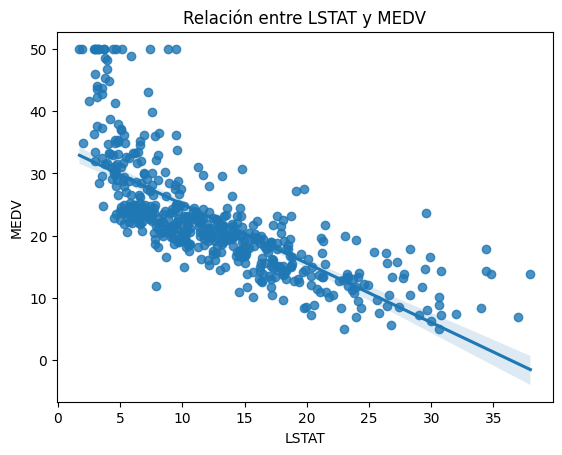

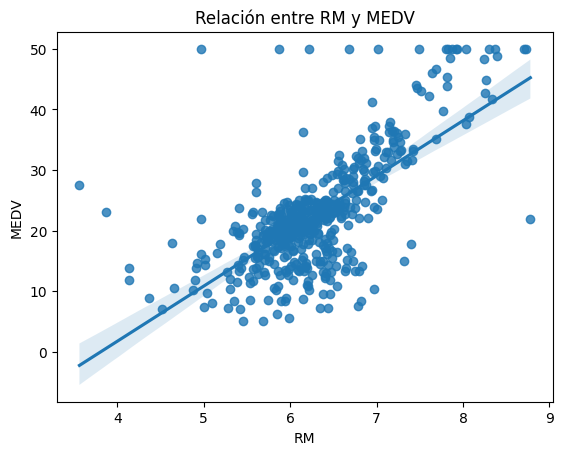

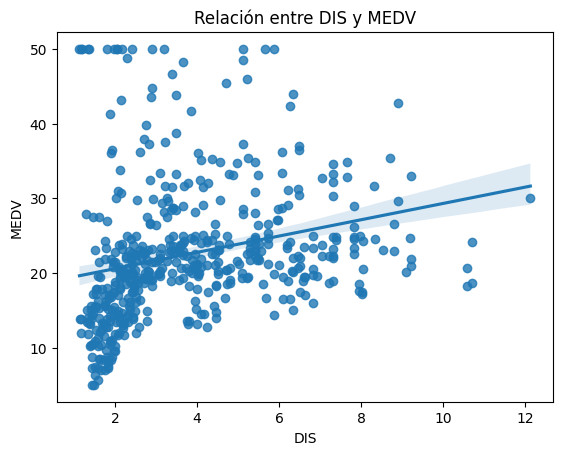

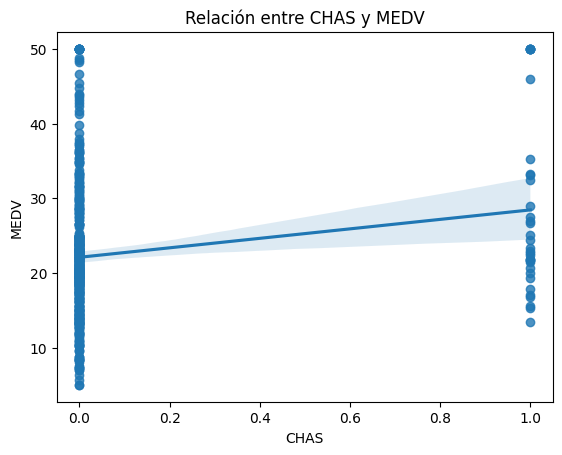

In [10]:
# Calcular correlaciones absolutas con MEDV
corr_medv = df.corr()["MEDV"].abs().sort_values(ascending=False)

# Seleccionar las 2 correlaciones más fuertes (excluyendo MEDV)
fuertes = corr_medv.index[1:3]

# Seleccionar las 2 correlaciones más débiles
debil = corr_medv.index[-2:]

print("Atributos con correlación más fuerte:", fuertes.values)
print("Atributos con correlación más débil:", debil.values)

# Graficar scatter + regresión lineal
for col in list(fuertes) + list(debil):
    sns.regplot(x=df[col], y=df["MEDV"])
    plt.title(f"Relación entre {col} y MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>

Al ver los gráficos, sí se nota claramente lo que ya habíamos visto numéricamente. En el caso de LSTAT y RM, las correlaciones fuertes se reflejan muy bien: LSTAT tiene una pendiente negativa marcada y los puntos siguen una tendencia descendente, mientras que RM muestra una línea ascendente bastante clara. En ambos casos, los puntos se agrupan alrededor de la recta, lo que confirma la relación fuerte.

Por otro lado, en DIS y CHAS la relación con MEDV casi no se aprecia. Los puntos están muy dispersos y la recta de regresión apenas tiene inclinación, lo que coincide con que sus correlaciones eran mucho más bajas.


---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


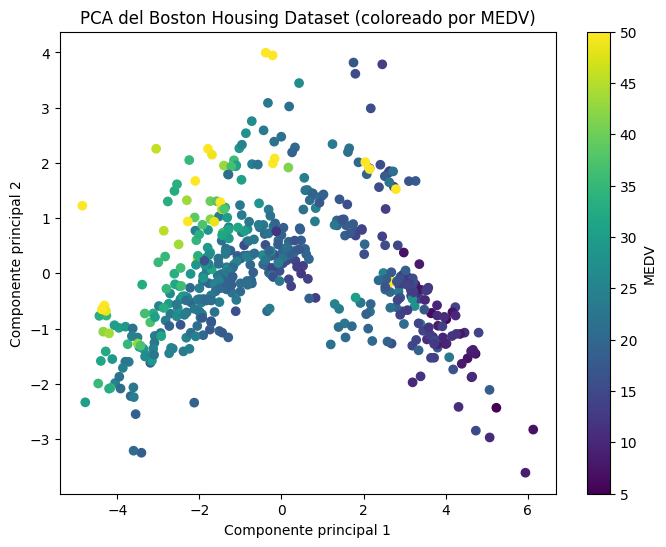

In [12]:

# 1. Seleccionar todas las variables excepto MEDV
X = df.drop(columns=["MEDV"])

# 2. Escalar los datos (PCA funciona mejor con datos estandarizados)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# 4. Crear un scatter plot de las dos componentes
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1],
            c=df["MEDV"], cmap="viridis")
plt.colorbar(label="MEDV")  # barra de colores
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("PCA del Boston Housing Dataset (coloreado por MEDV)")
plt.show()

En el gráfico del PCA se puede ver que los puntos no están completamente separados en grupos claros, pero sí aparece un patrón interesante relacionado con el valor de MEDV. Los colores más claros (casas con precios más altos) tienden a concentrarse en una zona del gráfico, mientras que los valores más bajos se agrupan en otra. Esto muestra que, aunque el PCA reduce toda la información a solo dos componentes, todavía es capaz de reflejar cierta relación con el precio de las viviendas.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


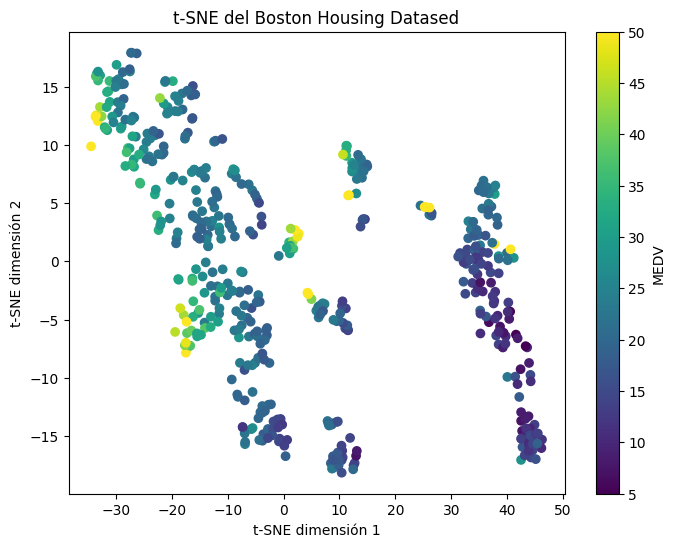

In [15]:
X = df.drop(columns=["MEDV"])

# 2. Escalamos los datos (es buena práctica para métodos basados en distancias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicamos t-SNE a 2 dimensiones
tsne = TSNE(
    n_components=2,
    perplexity=30,      # puedes probar otros valores: 5, 10, 40...
    learning_rate=200, # también se puede modificar
    random_state=0
)

tsne_result = tsne.fit_transform(X_scaled)

# 4. Graficamos el resultado y coloreamos por MEDV
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
            c=df["MEDV"], cmap="viridis")
plt.colorbar(label="MEDV")
plt.xlabel("t-SNE dimensión 1")
plt.ylabel("t-SNE dimensión 2")
plt.title("t-SNE del Boston Housing Datased")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Comparando los gráficos de PCA y t-SNE, sí parece que la reducción de dimensionalidad ha funcionado, pero cada método lo hace de manera distinta. En el caso de PCA, las dos nuevas dimensiones logran mostrar cierta relación con MEDV, aunque los grupos no quedan claramente separados. Esto es normal porque PCA intenta conservar la variabilidad global, no necesariamente separar clases o valores.

En cambio, t-SNE sí genera agrupaciones más visibles y permite apreciar zonas donde los precios altos y bajos tienden a concentrarse. Esto ocurre porque t-SNE se enfoca en preservar relaciones locales entre los puntos, lo que ayuda a formar estructuras más definidas visualmente.

Si usáramos estas nuevas variables para predecir MEDV, lo más probable es que PCA funcione mejor que t-SNE, porque PCA genera componentes lineales que sí se pueden usar directamente en modelos de regresión. t-SNE, en cambio, sirve más para visualización que para modelar, ya que no conserva relaciones globales y no es estable entre ejecuciones.

Obtenemos resultados tan distintos porque PCA es un método lineal basado en varianza, mientras que t-SNE es no lineal y está diseñado para resaltar patrones locales, por eso sus gráficos parecen mucho más “agrupados”.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [17]:
random_state = 9

X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print("Dimensiones conjunto original:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# Modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_original = mean_squared_error(y_test, y_pred)
print("MSE usando datos originales:", mse_original)



# 2. Dataset reducido con PCA


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir datos PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=random_state)

print("\nDimensiones conjunto PCA:")
print("X_train_pca:", X_train_pca.shape)
print("X_test_pca:", X_test_pca.shape)

# Modelo de regresión lineal para PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
print("MSE usando datos reducidos con PCA:", mse_pca)



# 3. K-means para predecir CHAS

X_chas = df.drop(columns=["CHAS"])
y_chas = df["CHAS"]

# Escalar
X_chas_scaled = scaler.fit_transform(X_chas)

# Entrenar K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans.fit(X_chas_scaled)

# Predecir clusters para CHAS
pred_chas = kmeans.labels_

# Ajustar etiquetas (porque K-means no sabe qué cluster es 0 o 1)
if accuracy_score(y_chas, pred_chas) < 0.5:
    pred_chas = 1 - pred_chas

accuracy = accuracy_score(y_chas, pred_chas)
print("\nPrecisión de K-means prediciendo CHAS:", accuracy)


Dimensiones conjunto original:
X_train: (354, 13)
X_test: (152, 13)
MSE usando datos originales: 19.29574907336337

Dimensiones conjunto PCA:
X_train_pca: (354, 2)
X_test_pca: (152, 2)
MSE usando datos reducidos con PCA: 44.57270384601899

Precisión de K-means prediciendo CHAS: 0.6324110671936759


Al comparar los modelos entrenados con los datos originales y con el conjunto reducido por PCA, se nota claramente que el modelo con los datos completos funciona mucho mejor. El MSE con todas las variables es de alrededor de 19, mientras que usando solo las dos componentes del PCA sube a aproximadamente 44. Esto tiene sentido porque PCA reduce la información del dataset a solo dos dimensiones, y aunque es útil para visualización, pierde mucha información relevante para predecir MEDV.

En el caso de K-means para predecir CHAS, la precisión obtenida (~0.63) es moderada. Esto era esperable porque K-means no es un método supervisado y CHAS no forma agrupamientos naturales muy claros en el espacio de los datos. Aun así, el modelo logra identificar cierta separación entre las dos clases.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [26]:
# 1. Dataset original
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# 2. Dividir en train y test (usando random_state = 9)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=9
)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

# 3. Definir modelo
model = LinearRegression()

# 4. Validación cruzada con R2
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# 5. Validación cruzada con MAE
mae_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=5,
    scoring=make_scorer(mean_absolute_error)
)

# 6. Mostrar resultados
print("\nR2 Scores:", r2_scores)
print("Media R2:", np.mean(r2_scores))
print("Desviación estándar R2:", np.std(r2_scores))

print("\nMAE Scores:", mae_scores)
print("Media MAE:", np.mean(mae_scores))
print("Desviación estándar MAE:", np.std(mae_scores))

Dimensiones del conjunto de entrenamiento: (354, 13)
Dimensiones del conjunto de prueba: (152, 13)

R2 Scores: [0.70486633 0.69704032 0.73834158 0.6182397  0.65698975]
Media R2: 0.683095537219393
Desviación estándar R2: 0.04149299156960776

MAE Scores: [3.49495136 3.22586055 2.87893802 4.85407901 3.17806056]
Media MAE: 3.526377900016513
Desviación estándar MAE: 0.6920392950345178


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [27]:
# 1. Datos originales (sin MEDV)
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

# 2. Escalar y aplicar PCA (2 componentes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Dividir en train y test usando las componentes de PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=9
)

print("Dimensiones del conjunto PCA:")
print("X_train_pca:", X_train_pca.shape)
print("X_test_pca:", X_test_pca.shape)

# 4. Definir modelo
model_pca = LinearRegression()

# 5. Validación cruzada con R2
r2_scores_pca = cross_val_score(
    model_pca, X_train_pca, y_train, cv=5, scoring='r2'
)

# 6. Validación cruzada con MAE
mae_scores_pca = cross_val_score(
    model_pca,
    X_train_pca,
    y_train,
    cv=5,
    scoring=make_scorer(mean_absolute_error)
)

# 7. Resultados
print("\nR2 (PCA):", r2_scores_pca)
print("Media R2 (PCA):", np.mean(r2_scores_pca))
print("STD R2 (PCA):", np.std(r2_scores_pca))

print("\nMAE (PCA):", mae_scores_pca)
print("Media MAE (PCA):", np.mean(mae_scores_pca))
print("STD MAE (PCA):", np.std(mae_scores_pca))

Dimensiones del conjunto PCA:
X_train_pca: (354, 2)
X_test_pca: (152, 2)

R2 (PCA): [0.40854358 0.42250724 0.28927763 0.35511401 0.6515153 ]
Media R2 (PCA): 0.42539155356798125
STD R2 (PCA): 0.12238468444182067

MAE (PCA): [5.1058333  4.46264536 5.13915755 6.13496919 3.28610463]
Media MAE (PCA): 4.825742004704749
STD MAE (PCA): 0.937345046509977


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona claramente mejor usando los datos originales. En ese caso, el R2 promedio es más alto (≈0.68) y el MAE es más bajo (≈3.5), lo que indica que el modelo logra explicar mejor la variación del precio de las casas y comete menos error al predecir.

Cuando usamos solo las dos componentes del PCA, el desempeño empeora: el R2 baja bastante (≈0.42) y el MAE aumenta (≈4.8). Esto tiene sentido porque PCA reduce toda la información del dataset a solo dos dimensiones, lo que implica perder muchos detalles relevantes para predecir MEDV. Por eso, aunque es útil para visualizar, no es tan bueno para entrenar modelos de regresión.

Estos resultados están totalmente alineados con lo que vimos en el ejercicio 3: PCA simplifica demasiado los datos y no separa tan bien la información relacionada con el precio, mientras que el dataset original conserva toda la estructura y relaciones importantes entre variables.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [30]:
# 1. Entrenar el modelo con los datos de entrenamiento (ya definidos antes)
model = LinearRegression()
model.fit(X_train, y_train)

# 2. Generar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 3. Calcular métricas R2 y MAE
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("Resultados en el conjunto de prueba:")
print("R2 (test):", r2_test)
print("MAE (test):", mae_test)

Resultados en el conjunto de prueba:
R2 (test): 0.782612607427101
MAE (test): 3.05374776256892


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Si tuviera que explicarle la calidad del modelo a un ejecutivo de una inmobiliaria, elegiría la métrica MAE.
El MAE indica, en promedio, cuántos miles de dólares se equivoca el modelo al predecir el precio de una vivienda. Es una métrica muy intuitiva y fácil de comprender para alguien que no trabaja con modelos matemáticos: decir “el modelo se equivoca alrededor de 3 mil dólares” es mucho más claro que hablar de porcentajes de varianza explicada.

En cambio, si la explicación fuera para un analista matemático o científico de datos, usaría R2.
El R2 es más útil desde un punto de vista técnico porque muestra qué proporción de la variabilidad total de los precios está siendo capturada por el modelo. Es una medida más profunda para evaluar qué tan bien el modelo se ajusta a los datos y permite compararlo con otros modelos de forma más rigurosa.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [33]:
# 1. Definir X (atributos) y y (CHAS)
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

# 2. train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=9
)

# 3. Definir y entrenar K-means (2 clusters porque CHAS es 0 o 1)
kmeans = KMeans(n_clusters=2, random_state=9)
kmeans.fit(X_train)

# 4. Predecir clusters sobre test
y_pred_clusters = kmeans.predict(X_test)

# 5. K-means no sabe cuál cluster es 0 y cuál es 1,
#    así que necesitamos mapearlos correctamente:
cluster_mapping = {}

# Encontrar qué cluster corresponde a CHAS = 1
for cluster in np.unique(y_pred_clusters):
    # mayoría verdadera en ese cluster
    mask = y_pred_clusters == cluster
    true_label = y_test[mask].mode()[0]
    cluster_mapping[cluster] = true_label

# Mapear predicciones reales
y_pred = np.array([cluster_mapping[c] for c in y_pred_clusters])

# 6. Calcular métricas
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Resultados clasificación con K-means:")
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1-score:", f1)

Resultados clasificación con K-means:
Precisión: 0.0
Sensibilidad (Recall): 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [35]:
# X = atributos sin CHAS, y = CHAS
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

# Escalar y reducir a 2 dimensiones
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train / test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=9
)

# K-means
kmeans = KMeans(n_clusters=2, random_state=9)
kmeans.fit(X_train_pca)

y_pred_clusters = kmeans.predict(X_test_pca)

# Probar las dos posibles asignaciones de etiquetas (0↔1)
y_pred_1 = y_pred_clusters
y_pred_2 = 1 - y_pred_clusters

f1_1 = f1_score(y_test, y_pred_1, zero_division=0)
f1_2 = f1_score(y_test, y_pred_2, zero_division=0)

# Elegir la mejor orientación
if f1_2 > f1_1:
    y_pred = y_pred_2
else:
    y_pred = y_pred_1

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Resultados clasificación con K-means (PCA):")
print("Precisión:", precision)
print("Sensibilidad (Recall):", recall)
print("F1-score:", f1)

Resultados clasificación con K-means (PCA):
Precisión: 0.08163265306122448
Sensibilidad (Recall): 0.7272727272727273
F1-score: 0.14678899082568808


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Si tuviera que explicar la calidad del modelo a un ejecutivo de una inmobiliaria, elegiría la sensibilidad (recall). Esto se debe a que el recall indica qué tan bien el modelo logra identificar los casos donde CHAS = 1, es decir, las viviendas cercanas al río Charles. Para un ejecutivo, suele ser más relevante entender cuántos de estos casos “importantes” está detectando el modelo. Además, es una métrica intuitiva: muestra cuántas oportunidades reales se están capturando y cuántas se están perdiendo.

En cambio, si la explicación fuera para un analista matemático, usaría el F1-score. Esta métrica combina precisión y recall, y refleja el equilibrio real del modelo entre acertar y detectar correctamente la clase minoritaria. Es más completa desde un punto de vista técnico, especialmente cuando las clases están desbalanceadas, como ocurre con CHAS.

En nuestro caso, el modelo tiene una precisión baja pero una sensibilidad relativamente alta. Esto significa que el modelo detecta muchos de los casos positivos, pero comete bastantes falsos positivos. El F1-score, que es bajo, resume exactamente esta situación: el modelo reconoce bien la clase 1, pero no lo hace con mucha precisión.

Finalmente, el modelo es mejor detectando que discriminando. “Detectar” se refleja en el recall alto (encuentra la mayoría de los CHAS=1), mientras que “acertar” se refleja en la precisión (muy baja). Esto significa que sí identifica varias viviendas cerca del río, pero al mismo tiempo clasifica erróneamente muchos casos como si estuvieran cerca del río cuando no lo están.